### Weather Impact on Bakery Sales

Key Questions:

 - Which weather conditions are associated with higher or lower sales?
 - Are specific products, such as hot drinks, more affected by weather patterns?
 - How can insights from this data be leveraged to increase sales?

In [56]:
# Import necessary libraries for data analysis, visualization, and machine learning.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import requests
import time
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

## Loading Data

In [57]:
#Loading Sales Data
sales_df = pd.read_csv('index.csv')
sales_df

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.70,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.70,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.90,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.70,Latte
...,...,...,...,...,...,...
2618,2024-12-23,2024-12-23 15:00:23.679,card,ANON-0000-0000-1036,30.86,Americano with Milk
2619,2024-12-23,2024-12-23 16:14:50.443,card,ANON-0000-0000-0906,35.76,Latte
2620,2024-12-23,2024-12-23 17:21:20.495,card,ANON-0000-0000-1037,25.96,Cortado
2621,2024-12-23,2024-12-23 17:22:40.297,card,ANON-0000-0000-1037,35.76,Latte


In [58]:
#Removing data fields that are not relevant to the analysis.
sales_df = sales_df.drop(columns = ['card', 'cash_type'])
sales_df

,date,datetime,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,38.70,Latte
1,2024-03-01,2024-03-01 12:19:22.539,38.70,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,38.70,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,28.90,Americano
4,2024-03-01,2024-03-01 13:48:14.626,38.70,Latte
...,...,...,...,...
2618,2024-12-23,2024-12-23 15:00:23.679,30.86,Americano with Milk
2619,2024-12-23,2024-12-23 16:14:50.443,35.76,Latte
2620,2024-12-23,2024-12-23 17:21:20.495,25.96,Cortado
2621,2024-12-23,2024-12-23 17:22:40.297,35.76,Latte


In [59]:
#Importing weather data from the Visual Crossing website for analysis.
weather_df = pd.read_csv('Kyiv_Weather.csv')
weather_df.head()

,datetime,temp,feelslike,dew,humidity,windspeed,cloudcover,conditions,icon
0,2024-01-01,1.4,-0.9,0.2,91.6,13.3,94.8,"Snow, Rain, Overcast",snow
1,2024-01-02,-0.6,-5.6,-3.1,83.1,28.1,99.1,"Snow, Rain, Overcast",rain
2,2024-01-03,-4.7,-8.6,-6.7,86.3,20.9,99.5,"Snow, Overcast",snow
3,2024-01-04,1.3,-0.2,0.3,92.9,11.5,100.0,"Snow, Rain, Overcast",snow
4,2024-01-05,-0.9,-4.7,-2.4,89.4,23.4,87.6,"Snow, Rain, Partially cloudy",rain


In [60]:
#Renaming columns to ensure compatibility for an inner join using the date as the common key.
weather_df = weather_df.rename(columns={'datetime': 'date'})
weather_df

,date,temp,feelslike,dew,humidity,windspeed,cloudcover,conditions,icon
0,2024-01-01,1.4,-0.9,0.2,91.6,13.3,94.8,"Snow, Rain, Overcast",snow
1,2024-01-02,-0.6,-5.6,-3.1,83.1,28.1,99.1,"Snow, Rain, Overcast",rain
2,2024-01-03,-4.7,-8.6,-6.7,86.3,20.9,99.5,"Snow, Overcast",snow
3,2024-01-04,1.3,-0.2,0.3,92.9,11.5,100.0,"Snow, Rain, Overcast",snow
4,2024-01-05,-0.9,-4.7,-2.4,89.4,23.4,87.6,"Snow, Rain, Partially cloudy",rain
...,...,...,...,...,...,...,...,...,...
361,2024-12-27,0.5,-0.3,0.1,96.8,10.1,99.6,"Snow, Rain, Overcast",rain
362,2024-12-28,0.3,-1.3,-0.6,93.8,7.6,97.7,Overcast,cloudy
363,2024-12-29,0.1,-1.3,-0.6,95.1,7.2,99.3,"Snow, Rain, Overcast",snow
364,2024-12-30,0.3,-2.6,-0.6,93.1,13.0,98.8,"Snow, Rain, Overcast",rain


In [61]:
# Merging sales dataset with weather dataset based on date
df = pd.merge(sales_df, weather_df, on='date', how='inner')
df

,date,datetime,money,coffee_name,temp,feelslike,dew,humidity,windspeed,cloudcover,conditions,icon
0,2024-03-01,2024-03-01 10:15:50.520,38.70,Latte,4.4,2.6,-0.6,71.9,13.3,48.4,Partially cloudy,partly-cloudy-day
1,2024-03-01,2024-03-01 12:19:22.539,38.70,Hot Chocolate,4.4,2.6,-0.6,71.9,13.3,48.4,Partially cloudy,partly-cloudy-day
2,2024-03-01,2024-03-01 12:20:18.089,38.70,Hot Chocolate,4.4,2.6,-0.6,71.9,13.3,48.4,Partially cloudy,partly-cloudy-day
3,2024-03-01,2024-03-01 13:46:33.006,28.90,Americano,4.4,2.6,-0.6,71.9,13.3,48.4,Partially cloudy,partly-cloudy-day
4,2024-03-01,2024-03-01 13:48:14.626,38.70,Latte,4.4,2.6,-0.6,71.9,13.3,48.4,Partially cloudy,partly-cloudy-day
...,...,...,...,...,...,...,...,...,...,...,...,...
2618,2024-12-23,2024-12-23 15:00:23.679,30.86,Americano with Milk,-1.7,-3.5,-2.3,95.4,9.0,98.5,Overcast,cloudy
2619,2024-12-23,2024-12-23 16:14:50.443,35.76,Latte,-1.7,-3.5,-2.3,95.4,9.0,98.5,Overcast,cloudy
2620,2024-12-23,2024-12-23 17:21:20.495,25.96,Cortado,-1.7,-3.5,-2.3,95.4,9.0,98.5,Overcast,cloudy
2621,2024-12-23,2024-12-23 17:22:40.297,35.76,Latte,-1.7,-3.5,-2.3,95.4,9.0,98.5,Overcast,cloudy


## Data Cleaning and Understanding

In [62]:
#Checking the shape of Data frame
df.shape

(2623, 12)

In [63]:
# Looking into main parameters
df.describe()

,money,temp,feelslike,dew,humidity,windspeed,cloudcover
count,2623.000000,2623.000000,2623.000000,2623.000000,2623.000000,2623.000000,2623.000000
mean,31.889478,13.622836,12.759855,7.371788,69.828403,16.593252,60.278422
std,5.015394,8.221676,9.302471,6.434067,14.374192,5.972330,30.211641
min,18.120000,-6.000000,-10.500000,-10.800000,38.500000,6.500000,0.000000
25%,27.920000,6.300000,4.600000,1.750000,59.500000,12.200000,37.800000
50%,32.820000,15.700000,15.600000,7.900000,70.900000,16.200000,63.100000
75%,35.760000,20.700000,20.700000,12.600000,79.900000,19.800000,87.200000
max,40.000000,29.400000,30.100000,20.600000,97.600000,37.100000,100.000000


In [64]:
# Checking for Null values 
df.isna().sum()

date           0
datetime       0
money          0
coffee_name    0
temp           0
feelslike      0
dew            0
humidity       0
windspeed      0
cloudcover     0
conditions     0
icon           0
dtype: int64

In [65]:
#Checking quick info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2623 entries, 0 to 2622
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         2623 non-null   object 
 1   datetime     2623 non-null   object 
 2   money        2623 non-null   float64
 3   coffee_name  2623 non-null   object 
 4   temp         2623 non-null   float64
 5   feelslike    2623 non-null   float64
 6   dew          2623 non-null   float64
 7   humidity     2623 non-null   float64
 8   windspeed    2623 non-null   float64
 9   cloudcover   2623 non-null   float64
 10  conditions   2623 non-null   object 
 11  icon         2623 non-null   object 
dtypes: float64(7), object(5)
memory usage: 246.0+ KB


In [66]:
# Changing object datatype to date time
df['datetime'] = pd.to_datetime(df['datetime'])
df['date'] = pd.to_datetime(df['date'])

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2623 entries, 0 to 2622
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         2623 non-null   datetime64[ns]
 1   datetime     2623 non-null   datetime64[ns]
 2   money        2623 non-null   float64       
 3   coffee_name  2623 non-null   object        
 4   temp         2623 non-null   float64       
 5   feelslike    2623 non-null   float64       
 6   dew          2623 non-null   float64       
 7   humidity     2623 non-null   float64       
 8   windspeed    2623 non-null   float64       
 9   cloudcover   2623 non-null   float64       
 10  conditions   2623 non-null   object        
 11  icon         2623 non-null   object        
dtypes: datetime64[ns](2), float64(7), object(3)
memory usage: 246.0+ KB


In [68]:
# We are checking for duplicates, because of limited options some transactions are identical and count as duplicate, we agreed to keep them for analysis.
df.duplicated().any()

np.False_

In [69]:
# This will create new data frame of unique values of each column
columnValue = df.nunique().reset_index()
columnValue

,index,0
0,date,294
1,datetime,2623
2,money,20
3,coffee_name,8
4,temp,180
5,feelslike,184
6,dew,181
7,humidity,223
8,windspeed,70
9,cloudcover,246


In [70]:
# Info about categorical values
df.describe(include = object)

,coffee_name,conditions,icon
count,2623,2623,2623
unique,8,10,5
top,Americano with Milk,Partially cloudy,rain
freq,621,914,1089


## Univariate Analysis & Visualizations

In [71]:
#Function to visualized categorical column using count plot
def count_plot(x_axis=None, y_axis=None, hue=None, rotation=0, top=None, save=False):
    """
    Visualize categorical columns using a count plot.
    - x_axis: Column name for the x-axis (categorical/object type expected)
    - y_axis: Column name for the y-axis
    - hue: Column for grouping by color
    - rotation: Rotation angle for x-axis labels
    - top: Number of unique values to display
    - save: If True, saves the plot with a unique filename
    """
    # Validate input
    if not x_axis and not y_axis:
        raise ValueError("Either 'x_axis' or 'y_axis' must be provided.")

    # Determine order for plotting
    if x_axis:
        order = df[x_axis].value_counts().iloc[:top].index
    else:
        order = df[y_axis].value_counts().iloc[:top].index

    # Create the count plot
    graph = sns.countplot(x=x_axis, y=y_axis, data=df, hue=hue, order=order, palette="RdBu")
    
    # Add labels to the bars
    for container in graph.containers:
        graph.bar_label(container)

    # Rotate x-axis labels if needed
    plt.xticks(rotation=rotation)

    # Save the plot if requested
    if save:
        timestamp = time.strftime("%Y%m%d-%H%M%S")
        filename = f"count_plot_{timestamp}.png"
        plt.savefig(filename, bbox_inches="tight")
        print(f"Plot saved as {filename}")

    # Display the plot
    plt.show()

In [114]:
# Creating function that visualized categorical column using pie plot

def pie_plot(column_name, explodeIndex = None, save= False):
    """
    1) input : column name, column data type must be object or categorical
    2) explodeIndex, is the index i need to explode it 
    2) output : circle chart that shows size of each unique values and percentage 
    """
    # Create explode list with zeros of size equal to the number of unique values
    explodeList = [0] * df[column_name].nunique()
    
    # Check and set explodeIndex value 
    if explodeIndex is not None:
        explodeList[explodeIndex] = 0.1
    # Save the plot if requested
    if save:
        timestamp = time.strftime("%Y%m%d-%H%M%S")
        filename = f"count_plot_{timestamp}.png"
        plt.savefig(filename, bbox_inches="tight")
        print(f"Plot saved as {filename}")

    # Create pie plot
    plt.pie(df[column_name].value_counts(), labels = df[column_name].value_counts().index, shadow = True, autopct = "%1.1f%%",  explode = explodeList)
    plt.show()

In [73]:
# See unique values for date 
df["date"].unique()[:25]

<DatetimeArray>
['2024-03-01 00:00:00', '2024-03-02 00:00:00', '2024-03-03 00:00:00',
 '2024-03-04 00:00:00', '2024-03-05 00:00:00', '2024-03-06 00:00:00',
 '2024-03-07 00:00:00', '2024-03-08 00:00:00', '2024-03-09 00:00:00',
 '2024-03-10 00:00:00', '2024-03-11 00:00:00', '2024-03-12 00:00:00',
 '2024-03-13 00:00:00', '2024-03-14 00:00:00', '2024-03-15 00:00:00',
 '2024-03-16 00:00:00', '2024-03-17 00:00:00', '2024-03-18 00:00:00',
 '2024-03-19 00:00:00', '2024-03-20 00:00:00', '2024-03-21 00:00:00',
 '2024-03-22 00:00:00', '2024-03-23 00:00:00', '2024-03-24 00:00:00',
 '2024-03-25 00:00:00']
Length: 25, dtype: datetime64[ns]

In [74]:
# add new column year
df["year"] = df["datetime"].dt.year

# add new column month
df["month"] = df["datetime"].dt.month_name()

# add new column day
df["day"] = df["datetime"].dt.day_name()

In [75]:
df['year'].unique()

array([2024], dtype=int32)

In [76]:
df['month'].unique()

array(['March', 'April', 'May', 'June', 'July', 'August', 'September',
       'October', 'November', 'December'], dtype=object)

In [77]:
df['day'].unique()

array(['Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday'], dtype=object)

C:\Users\PC\AppData\Local\Temp\ipykernel_59356\1555064390.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph = sns.countplot(x=x_axis, y=y_axis, data=df, hue=hue, order=order, palette="RdBu")


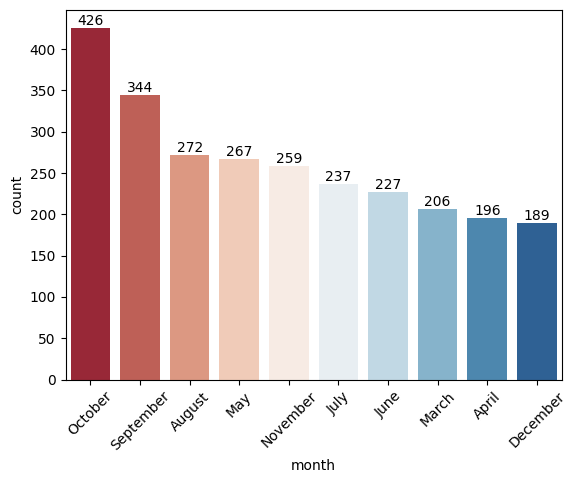

In [118]:
# Seeing number of transactions for each month 
count_plot(x_axis= 'month', rotation= 45, save = False)

The busiest month is October, followed by September and August, indicating a peak in sales during the autumn season.


Plot saved as count_plot_20250125-191538.png


C:\Users\PC\AppData\Local\Temp\ipykernel_59356\1555064390.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph = sns.countplot(x=x_axis, y=y_axis, data=df, hue=hue, order=order, palette="RdBu")


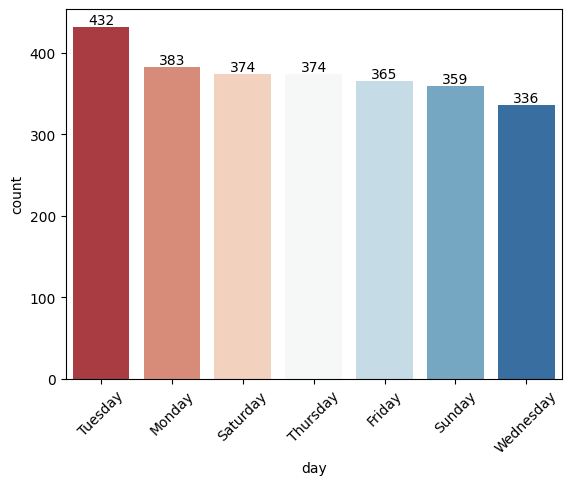

In [110]:
#Sales by day of the week 
count_plot(x_axis = 'day', rotation = 45, save = False)

The busiest day of the week is Tuesday, while the quietest is Wednesday, suggesting a midweek dip in sales activity.

In [80]:
df["hour"] = df["datetime"].apply(lambda x : x.hour)

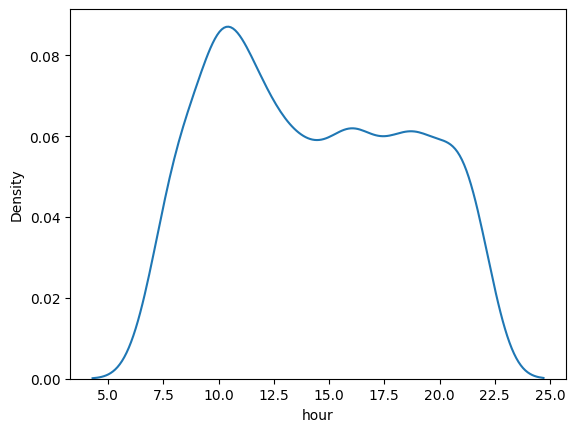

In [121]:
#Distribution by the time of thransactions.
sns.kdeplot(df["hour"])
plt.show()

Most sales occurred between 10 AM and 8 PM, with a noticeable peak at 10 AM, likely due to the morning rush.

In [82]:
df

,date,datetime,money,coffee_name,temp,feelslike,dew,humidity,windspeed,cloudcover,conditions,icon,year,month,day,hour
0,2024-03-01,2024-03-01 10:15:50.520,38.70,Latte,4.4,2.6,-0.6,71.9,13.3,48.4,Partially cloudy,partly-cloudy-day,2024,March,Friday,10
1,2024-03-01,2024-03-01 12:19:22.539,38.70,Hot Chocolate,4.4,2.6,-0.6,71.9,13.3,48.4,Partially cloudy,partly-cloudy-day,2024,March,Friday,12
2,2024-03-01,2024-03-01 12:20:18.089,38.70,Hot Chocolate,4.4,2.6,-0.6,71.9,13.3,48.4,Partially cloudy,partly-cloudy-day,2024,March,Friday,12
3,2024-03-01,2024-03-01 13:46:33.006,28.90,Americano,4.4,2.6,-0.6,71.9,13.3,48.4,Partially cloudy,partly-cloudy-day,2024,March,Friday,13
4,2024-03-01,2024-03-01 13:48:14.626,38.70,Latte,4.4,2.6,-0.6,71.9,13.3,48.4,Partially cloudy,partly-cloudy-day,2024,March,Friday,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2618,2024-12-23,2024-12-23 15:00:23.679,30.86,Americano with Milk,-1.7,-3.5,-2.3,95.4,9.0,98.5,Overcast,cloudy,2024,December,Monday,15
2619,2024-12-23,2024-12-23 16:14:50.443,35.76,Latte,-1.7,-3.5,-2.3,95.4,9.0,98.5,Overcast,cloudy,2024,December,Monday,16
2620,2024-12-23,2024-12-23 17:21:20.495,25.96,Cortado,-1.7,-3.5,-2.3,95.4,9.0,98.5,Overcast,cloudy,2024,December,Monday,17
2621,2024-12-23,2024-12-23 17:22:40.297,35.76,Latte,-1.7,-3.5,-2.3,95.4,9.0,98.5,Overcast,cloudy,2024,December,Monday,17


In [83]:
df.columns

Index(['date', 'datetime', 'money', 'coffee_name', 'temp', 'feelslike', 'dew',
       'humidity', 'windspeed', 'cloudcover', 'conditions', 'icon', 'year',
       'month', 'day', 'hour'],
      dtype='object')

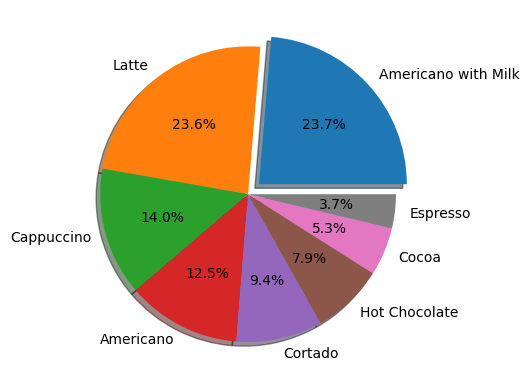

In [120]:
# Defining the most selling products
pie_plot(column_name = "coffee_name", explodeIndex = 0, save = False)

From the following chart, we can see that the most popular drinks are Latte and Americano with milk, accounting for 48% of total sales.

In [85]:
df['conditions'].value_counts()

conditions
Partially cloudy                914
Rain, Partially cloudy          737
Clear                           336
Rain, Overcast                  273
Overcast                        154
Snow, Rain, Overcast            137
Snow, Rain, Partially cloudy     50
Snow, Overcast                   10
Snow, Rain                        8
Rain                              4
Name: count, dtype: int64

In [86]:
# Calculating total daily sales to analyze the impact of weather conditions on sales trends.
daily_sales = df.groupby('date')['money'].sum().reset_index()
daily_sales.rename(columns={'money': 'total_sales'}, inplace=True)
daily_sales

,date,total_sales
0,2024-03-01,396.30
1,2024-03-02,228.10
2,2024-03-03,349.10
3,2024-03-04,135.20
4,2024-03-05,338.50
...,...,...
289,2024-12-19,333.10
290,2024-12-20,267.94
291,2024-12-21,477.60
292,2024-12-22,240.52


In [87]:
weather_df

,date,temp,feelslike,dew,humidity,windspeed,cloudcover,conditions,icon
0,2024-01-01,1.4,-0.9,0.2,91.6,13.3,94.8,"Snow, Rain, Overcast",snow
1,2024-01-02,-0.6,-5.6,-3.1,83.1,28.1,99.1,"Snow, Rain, Overcast",rain
2,2024-01-03,-4.7,-8.6,-6.7,86.3,20.9,99.5,"Snow, Overcast",snow
3,2024-01-04,1.3,-0.2,0.3,92.9,11.5,100.0,"Snow, Rain, Overcast",snow
4,2024-01-05,-0.9,-4.7,-2.4,89.4,23.4,87.6,"Snow, Rain, Partially cloudy",rain
...,...,...,...,...,...,...,...,...,...
361,2024-12-27,0.5,-0.3,0.1,96.8,10.1,99.6,"Snow, Rain, Overcast",rain
362,2024-12-28,0.3,-1.3,-0.6,93.8,7.6,97.7,Overcast,cloudy
363,2024-12-29,0.1,-1.3,-0.6,95.1,7.2,99.3,"Snow, Rain, Overcast",snow
364,2024-12-30,0.3,-2.6,-0.6,93.1,13.0,98.8,"Snow, Rain, Overcast",rain


In [88]:
daily_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         294 non-null    datetime64[ns]
 1   total_sales  294 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.7 KB


In [89]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        366 non-null    object 
 1   temp        366 non-null    float64
 2   feelslike   366 non-null    float64
 3   dew         366 non-null    float64
 4   humidity    366 non-null    float64
 5   windspeed   366 non-null    float64
 6   cloudcover  366 non-null    float64
 7   conditions  366 non-null    object 
 8   icon        366 non-null    object 
dtypes: float64(6), object(3)
memory usage: 25.9+ KB


In [90]:
weather_df['date'] = pd.to_datetime(weather_df['date'])

In [91]:
# Merging datasets, total sales with weather dataset
sales_to_weather = pd.merge(daily_sales,weather_df, on='date', how='inner')
sales_to_weather

,date,total_sales,temp,feelslike,dew,humidity,windspeed,cloudcover,conditions,icon
0,2024-03-01,396.30,4.4,2.6,-0.6,71.9,13.3,48.4,Partially cloudy,partly-cloudy-day
1,2024-03-02,228.10,3.2,0.8,-1.2,74.3,14.0,30.2,Partially cloudy,partly-cloudy-day
2,2024-03-03,349.10,2.0,-0.9,-1.7,77.0,18.0,89.7,Partially cloudy,partly-cloudy-day
3,2024-03-04,135.20,3.4,0.9,-0.8,75.2,16.6,82.0,Partially cloudy,partly-cloudy-day
4,2024-03-05,338.50,4.7,3.2,-0.1,72.4,10.1,56.1,Partially cloudy,partly-cloudy-day
...,...,...,...,...,...,...,...,...,...,...
289,2024-12-19,333.10,4.4,1.7,2.0,84.5,19.8,94.4,"Snow, Rain, Overcast",rain
290,2024-12-20,267.94,3.2,0.2,1.5,89.0,18.0,86.4,"Rain, Partially cloudy",rain
291,2024-12-21,477.60,1.7,-0.4,0.1,89.3,16.6,89.2,"Snow, Rain, Partially cloudy",rain
292,2024-12-22,240.52,-1.7,-2.9,-3.7,86.1,10.8,91.9,Overcast,cloudy


In [92]:
# Compute correlation between numerical variables to understand relationships.
correlation = sales_to_weather[['total_sales', 'temp', 'feelslike', 'humidity', 'windspeed', 'cloudcover']].corr()
print(correlation)

             total_sales      temp  feelslike  humidity  windspeed  cloudcover
total_sales     1.000000 -0.106328  -0.092429  0.079598   0.024689    0.043915
temp           -0.106328  1.000000   0.997187 -0.627153  -0.142027   -0.457007
feelslike      -0.092429  0.997187   1.000000 -0.620726  -0.169766   -0.449657
humidity        0.079598 -0.627153  -0.620726  1.000000   0.084136    0.647303
windspeed       0.024689 -0.142027  -0.169766  0.084136   1.000000    0.223829
cloudcover      0.043915 -0.457007  -0.449657  0.647303   0.223829    1.000000


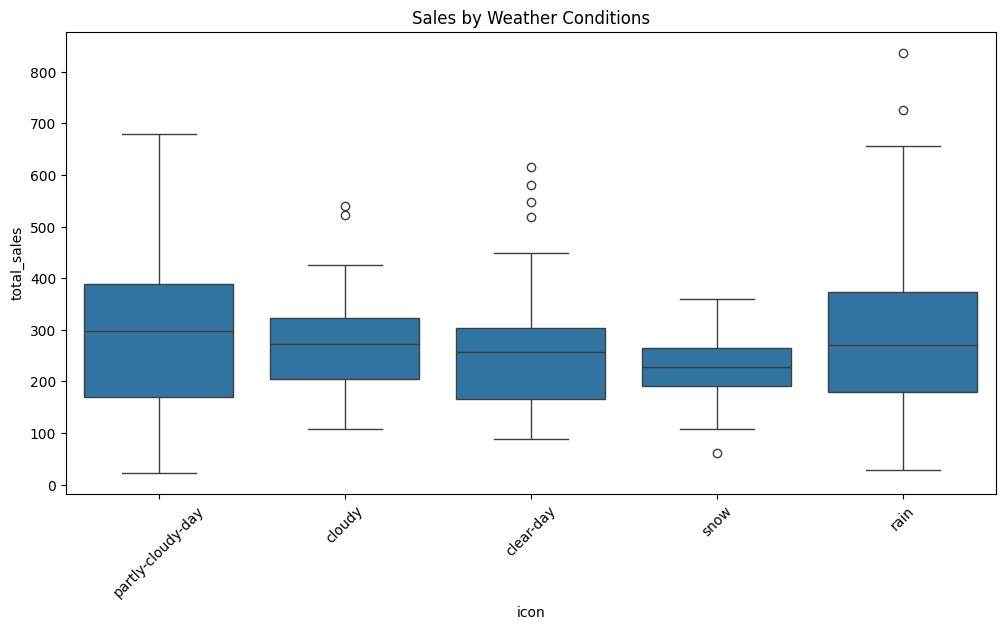

In [93]:
# Total sales boxplot by Weather Conditions 
plt.figure(figsize=(12, 6))
sns.boxplot(x='icon', y='total_sales', data=sales_to_weather)
# Set an appropriate title for the visualization.
plt.title('Sales by Weather Conditions')
plt.xticks(rotation=45)
plt.show()

The box plot analysis reveals that the highest sales volumes predominantly occur on rainy and partially cloudy days, followed closely by clear days. This observation suggests that specific weather conditions, particularly those with rain or partial cloud cover, may have a notable influence on sales activity.

In [94]:
# To perform sales to temparutere analysis we will use Bucket Vizualization
temperature_bins = pd.cut(sales_to_weather['temp'], bins=range(-10, 41, 5))
binned_data = sales_to_weather.groupby(temperature_bins, observed=False)['total_sales'].mean().reset_index()

In [95]:
# Adding the bins to dataframe
sales_to_weather['temperature_bin'] = temperature_bins
sales_to_weather

,date,total_sales,temp,feelslike,dew,humidity,windspeed,cloudcover,conditions,icon,temperature_bin
0,2024-03-01,396.30,4.4,2.6,-0.6,71.9,13.3,48.4,Partially cloudy,partly-cloudy-day,"(0, 5]"
1,2024-03-02,228.10,3.2,0.8,-1.2,74.3,14.0,30.2,Partially cloudy,partly-cloudy-day,"(0, 5]"
2,2024-03-03,349.10,2.0,-0.9,-1.7,77.0,18.0,89.7,Partially cloudy,partly-cloudy-day,"(0, 5]"
3,2024-03-04,135.20,3.4,0.9,-0.8,75.2,16.6,82.0,Partially cloudy,partly-cloudy-day,"(0, 5]"
4,2024-03-05,338.50,4.7,3.2,-0.1,72.4,10.1,56.1,Partially cloudy,partly-cloudy-day,"(0, 5]"
...,...,...,...,...,...,...,...,...,...,...,...
289,2024-12-19,333.10,4.4,1.7,2.0,84.5,19.8,94.4,"Snow, Rain, Overcast",rain,"(0, 5]"
290,2024-12-20,267.94,3.2,0.2,1.5,89.0,18.0,86.4,"Rain, Partially cloudy",rain,"(0, 5]"
291,2024-12-21,477.60,1.7,-0.4,0.1,89.3,16.6,89.2,"Snow, Rain, Partially cloudy",rain,"(0, 5]"
292,2024-12-22,240.52,-1.7,-2.9,-3.7,86.1,10.8,91.9,Overcast,cloudy,"(-5, 0]"


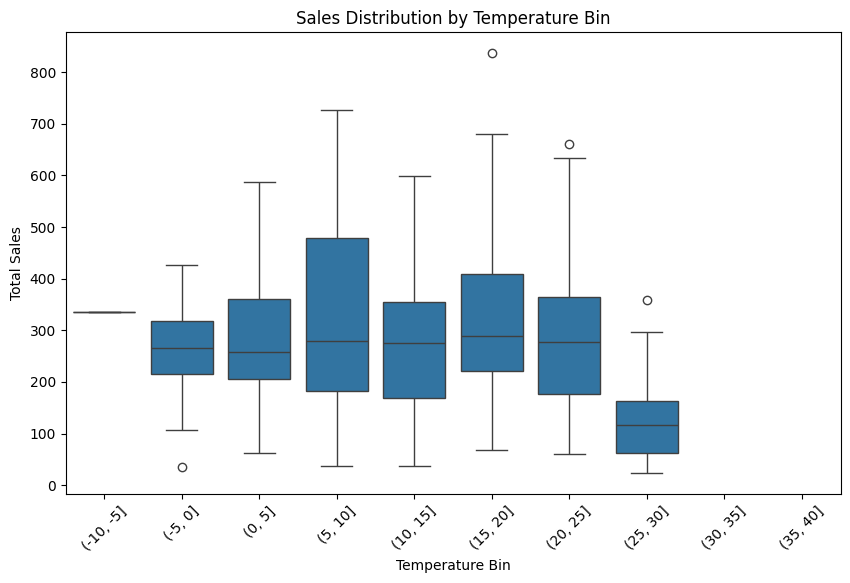

In [96]:
#Creating a boxplot 
plt.figure(figsize=(10, 6))
sns.boxplot(x='temperature_bin', y='total_sales', data=sales_to_weather)
# Set an appropriate title for the visualization.
plt.title('Sales Distribution by Temperature Bin')
# Label the x-axis and y-axis for better readability of the plot.
plt.xlabel('Temperature Bin')
# Label the x-axis and y-axis for better readability of the plot.
plt.ylabel('Total Sales')
plt.xticks(rotation=45)  
plt.show()


The analysis indicates that the highest average sales occurred on days with temperatures ranging between 5°C and 20°C. This suggests a potential correlation between moderate weather conditions and increased consumer activity or demand.

In [97]:
#Calculating Averages and Medians for Sales Under Different Weather Conditions
weather_stats = sales_to_weather.groupby('conditions')['total_sales'].agg(['mean', 'median']).reset_index()
weather_stats

,conditions,mean,median
0,Clear,269.092632,256.29
1,Overcast,295.016471,272.84
2,Partially cloudy,295.046263,297.34
3,Rain,116.580000,116.58
4,"Rain, Overcast",288.382581,267.94
5,"Rain, Partially cloudy",286.604146,269.66
6,"Snow, Overcast",318.400000,318.40
7,"Snow, Rain",266.480000,266.48
8,"Snow, Rain, Overcast",245.623333,231.86
9,"Snow, Rain, Partially cloudy",271.940000,233.39


In [98]:
#Renaming columns
weather_stats.rename(columns={'mean': 'average_sales', 'median': 'median_sales'}, inplace=True)
weather_stats

,conditions,average_sales,median_sales
0,Clear,269.092632,256.29
1,Overcast,295.016471,272.84
2,Partially cloudy,295.046263,297.34
3,Rain,116.580000,116.58
4,"Rain, Overcast",288.382581,267.94
5,"Rain, Partially cloudy",286.604146,269.66
6,"Snow, Overcast",318.400000,318.40
7,"Snow, Rain",266.480000,266.48
8,"Snow, Rain, Overcast",245.623333,231.86
9,"Snow, Rain, Partially cloudy",271.940000,233.39


In [99]:
weather_stats = weather_stats.sort_values(by='average_sales', ascending=False)

C:\Users\PC\AppData\Local\Temp\ipykernel_59356\2727156513.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='conditions', y='average_sales', data=weather_stats, palette='viridis')


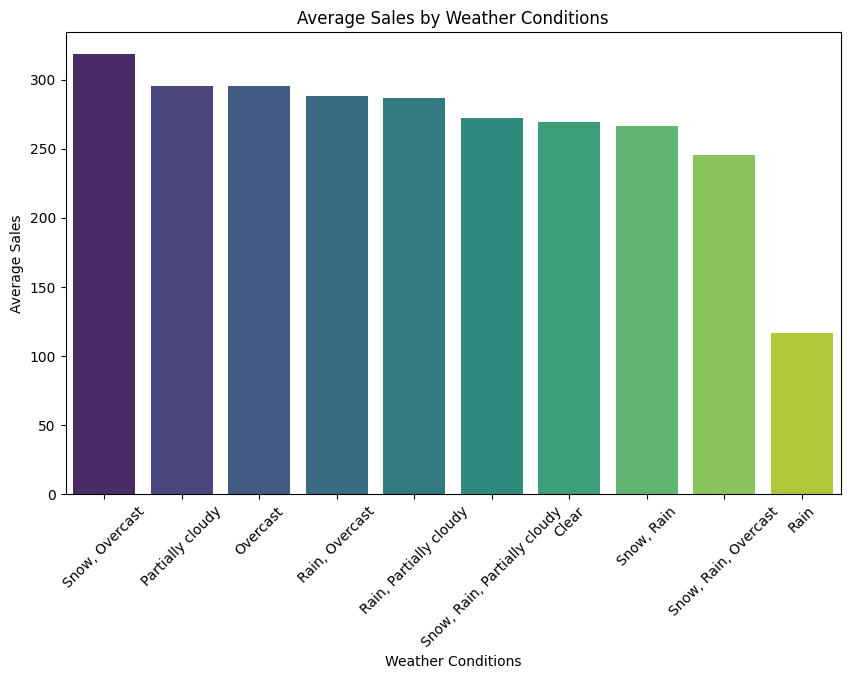

In [100]:
# Average sales by weather conditions bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='conditions', y='average_sales', data=weather_stats, palette='viridis')

# Add labels and title
plt.title('Average Sales by Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

## Encoding categorical values 

In [101]:
sales_to_weather

,date,total_sales,temp,feelslike,dew,humidity,windspeed,cloudcover,conditions,icon,temperature_bin
0,2024-03-01,396.30,4.4,2.6,-0.6,71.9,13.3,48.4,Partially cloudy,partly-cloudy-day,"(0, 5]"
1,2024-03-02,228.10,3.2,0.8,-1.2,74.3,14.0,30.2,Partially cloudy,partly-cloudy-day,"(0, 5]"
2,2024-03-03,349.10,2.0,-0.9,-1.7,77.0,18.0,89.7,Partially cloudy,partly-cloudy-day,"(0, 5]"
3,2024-03-04,135.20,3.4,0.9,-0.8,75.2,16.6,82.0,Partially cloudy,partly-cloudy-day,"(0, 5]"
4,2024-03-05,338.50,4.7,3.2,-0.1,72.4,10.1,56.1,Partially cloudy,partly-cloudy-day,"(0, 5]"
...,...,...,...,...,...,...,...,...,...,...,...
289,2024-12-19,333.10,4.4,1.7,2.0,84.5,19.8,94.4,"Snow, Rain, Overcast",rain,"(0, 5]"
290,2024-12-20,267.94,3.2,0.2,1.5,89.0,18.0,86.4,"Rain, Partially cloudy",rain,"(0, 5]"
291,2024-12-21,477.60,1.7,-0.4,0.1,89.3,16.6,89.2,"Snow, Rain, Partially cloudy",rain,"(0, 5]"
292,2024-12-22,240.52,-1.7,-2.9,-3.7,86.1,10.8,91.9,Overcast,cloudy,"(-5, 0]"


In [102]:
sales_to_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             294 non-null    datetime64[ns]
 1   total_sales      294 non-null    float64       
 2   temp             294 non-null    float64       
 3   feelslike        294 non-null    float64       
 4   dew              294 non-null    float64       
 5   humidity         294 non-null    float64       
 6   windspeed        294 non-null    float64       
 7   cloudcover       294 non-null    float64       
 8   conditions       294 non-null    object        
 9   icon             294 non-null    object        
 10  temperature_bin  294 non-null    category      
dtypes: category(1), datetime64[ns](1), float64(7), object(2)
memory usage: 23.8+ KB


In [103]:
# Encoding categorical variables to convert them into numerical format
label_encoder = LabelEncoder()
columns = sales_to_weather.select_dtypes(include='object')
for column in columns:
    sales_to_weather[column] = label_encoder.fit_transform(sales_to_weather[column])

sales_to_weather.head()

,date,total_sales,temp,feelslike,dew,humidity,windspeed,cloudcover,conditions,icon,temperature_bin
0,2024-03-01,396.3,4.4,2.6,-0.6,71.9,13.3,48.4,2,2,"(0, 5]"
1,2024-03-02,228.1,3.2,0.8,-1.2,74.3,14.0,30.2,2,2,"(0, 5]"
2,2024-03-03,349.1,2.0,-0.9,-1.7,77.0,18.0,89.7,2,2,"(0, 5]"
3,2024-03-04,135.2,3.4,0.9,-0.8,75.2,16.6,82.0,2,2,"(0, 5]"
4,2024-03-05,338.5,4.7,3.2,-0.1,72.4,10.1,56.1,2,2,"(0, 5]"


## Building a prediction model

In [104]:
# Dropping the 'date' column and 'temperature_bin' as they are not suitable for regression analysis.  
# Since 'date' is a datetime type, we will extract and use its components: year, month, and day instead.
X = sales_to_weather.drop(columns=['total_sales', 'date', 'temperature_bin'])
X.head()

,temp,feelslike,dew,humidity,windspeed,cloudcover,conditions,icon
0,4.4,2.6,-0.6,71.9,13.3,48.4,2,2
1,3.2,0.8,-1.2,74.3,14.0,30.2,2,2
2,2.0,-0.9,-1.7,77.0,18.0,89.7,2,2
3,3.4,0.9,-0.8,75.2,16.6,82.0,2,2
4,4.7,3.2,-0.1,72.4,10.1,56.1,2,2


In [105]:
y = sales_to_weather['total_sales']
y.head()

0    396.3
1    228.1
2    349.1
3    135.2
4    338.5
Name: total_sales, dtype: float64

In [106]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   temp        294 non-null    float64
 1   feelslike   294 non-null    float64
 2   dew         294 non-null    float64
 3   humidity    294 non-null    float64
 4   windspeed   294 non-null    float64
 5   cloudcover  294 non-null    float64
 6   conditions  294 non-null    int64  
 7   icon        294 non-null    int64  
dtypes: float64(6), int64(2)
memory usage: 18.5 KB


In [107]:
# Checking for missing values in the dataset
X.isnull().sum()

temp          0
feelslike     0
dew           0
humidity      0
windspeed     0
cloudcover    0
conditions    0
icon          0
dtype: int64

In [108]:
model = LinearRegression()

# Splitting the dataset into training and testing sets for model evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
# Training the machine learning model using the training dataset
model.fit(X_train, y_train)
# Generate predictions using the trained model on the test dataset.
predictions = model.predict(X_test)
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')
# Assess model performance using accuracy and statistical evaluation metrics.
r2 = r2_score(y_test, predictions)
print(f'R-squared: {r2}')

Mean Squared Error: 19883.28956678549
R-squared: -0.045565506898965324


As we can see becuse of lack of data, our Linear Regression analysis shows not accurate prediction. We can icrease the accuracy by adding more data, more other objectives and transaction information.

## Conclusion - Key findings and Actionable Recommendation

Key findings (Sales Trends by time):
 - October is the best-selling month, followed by September and August.
 - The busiest day of the week is Tuesday.
 - Sales peak between 8 AM and 10 AM, indicating mornings are the most critical period for business.

Actionable Recommendation:
 - Seasonal Preparation: Start stocking up and preparing for increased demand from August, ahead of the peak sales months.
 - Staffing: Ensure adequate labor is available during peak hours (8 AM to 10 AM) to efficiently handle demand and reduce waiting times.

Key findings (Best-Selling Products)
 - Latte and Americano with milk are the most popular items, accounting for 47% of total sales.

Actionable Recommendation:
 - Focus marketing efforts and promotions on these best-sellers. For instance, bundle offers or loyalty rewards for these items could further boost their sales.

Key findings (Weather Influence on Sales)
 - Sales are highest on rainy and partially cloudy days, with clear days also contributing significantly.
 - Current menu options consist solely of hot drinks, leading to lower sales during hotter weather.

Actionable Recommendation:
 - Adjust the menu to include iced drinks to capitalize on hot weather. Promote these new offerings during the summer months to target untapped market demand.

Key findings (Temperature and Sales Correlation)
 - Average sales are highest on days with temperatures ranging between 5°C and 20°C.
 - Sales drop significantly during hotter weather.

Actionable Recommendation:
 - Use weather forecasts to optimize promotions. For example, emphasize hot drinks during cooler weather and iced beverages when temperatures rise.